In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading pac

True

In [2]:
data = pd.read_csv('data/ayada.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Ayada,1,I used to love coming here but the quality has...,2024-04-21 16:14:27.961559
1,Ayada,5,"Came here for my girlfriends 30th, and we had ...",2024-04-21 16:14:27.964941
2,Ayada,5,NaN,2024-04-21 16:14:27.968587
3,Ayada,5,We enjoyed the 2 dishes we ordered- pad kee ma...,2024-04-20 16:14:27.970910
4,Ayada,5,Great Thai spot in queens. Delicious and flavo...,2024-04-17 16:14:27.974151
...,...,...,...,...
1969,Ayada,5,NaN,2020-04-24 16:14:27.111631
1970,Ayada,5,NaN,2020-04-24 16:14:27.113539
1971,Ayada,5,So happy this opened! We used to travel to Que...,2020-04-24 16:14:27.115322
1972,Ayada,5,NaN,2020-04-24 16:14:27.575643


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60889/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Ayada,1,I used to love coming here but the quality has...,2024
1,Ayada,5,"Came here for my girlfriends 30th, and we had ...",2024
2,Ayada,5,NaN,2024
3,Ayada,5,We enjoyed the 2 dishes we ordered- pad kee ma...,2024
4,Ayada,5,Great Thai spot in queens. Delicious and flavo...,2024
...,...,...,...,...
1969,Ayada,5,NaN,2020
1970,Ayada,5,NaN,2020
1971,Ayada,5,So happy this opened! We used to travel to Que...,2020
1972,Ayada,5,NaN,2020


Charts for ratings

<AxesSubplot:xlabel='rating'>

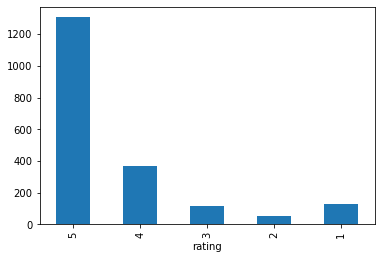

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

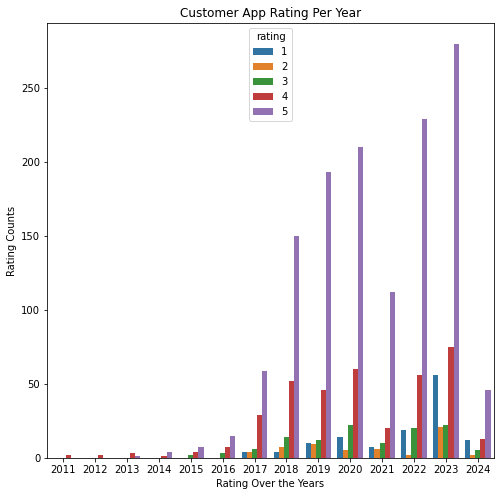

In [5]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [6]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60889/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,I used to love coming here but the quality has...
1,"Came here for my girlfriends 30th, and we had ..."
2,<NA>
3,We enjoyed the 2 dishes we ordered- pad kee ma...
4,Great Thai spot in queens. Delicious and flavo...
...,...
1969,<NA>
1970,<NA>
1971,So happy this opened! We used to travel to Que...
1972,<NA>


In [7]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [8]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60889/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Ayada,1,I used to love coming here but the quality has...,2024,love come qualiti servic terribl wait minut pa...
1,Ayada,5,"Came here for my girlfriends 30th, and we had ...",2024,girlfriend wonder experi staff super friendli ...
2,Ayada,5,<NA>,2024,
3,Ayada,5,We enjoyed the 2 dishes we ordered- pad kee ma...,2024,enjoy dish order pad kee mao drunken noodl wok...
4,Ayada,5,Great Thai spot in queens. Delicious and flavo...,2024,great thai spot queen delici flavor food mean ...


In [9]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('food', 908),
 ('thai', 691),
 ('good', 458),
 ('servic', 354),
 ('great', 337),
 ('place', 303),
 ('order', 237),
 ('delici', 234),
 ('restaur', 234),
 ('salad', 170),
 ('dish', 168),
 ('curri', 163),
 ('love', 156),
 ('time', 152),
 ('staff', 148),
 ('pad', 136),
 ('noodl', 136),
 ('recommend', 133),
 ('back', 130),
 ('nice', 129),
 ('amaz', 128),
 ('tast', 126),
 ('rice', 119),
 ('spici', 118),
 ('fri', 118),
 ('ayada', 117),
 ('tip', 115),
 ('price', 108),
 ('friendli', 105),
 ('authent', 98),
 ('eat', 97),
 ('flavor', 93),
 ('duck', 93),
 ('chelsea', 93),
 ('market', 91),
 ('favorit', 89),
 ('mango', 85),
 ('drunken', 83),
 ('excel', 82),
 ('chicken', 82),
 ('pork', 74),
 ('experi', 71),
 ('drink', 69),
 ('menu', 67),
 ('crispi', 65),
 ('nyc', 64),
 ('soup', 64),
 ('peopl', 64),
 ('friend', 63),
 ('server', 63)]

In [10]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60889/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Ayada,1,I used to love coming here but the quality has...,2024,love come qualiti servic terribl wait minut pa...,-1
1,Ayada,5,"Came here for my girlfriends 30th, and we had ...",2024,girlfriend wonder experi staff super friendli ...,1
2,Ayada,5,<NA>,2024,,1
3,Ayada,5,We enjoyed the 2 dishes we ordered- pad kee ma...,2024,enjoy dish order pad kee mao drunken noodl wok...,1
4,Ayada,5,Great Thai spot in queens. Delicious and flavo...,2024,great thai spot queen delici flavor food mean ...,1
...,...,...,...,...,...,...
1969,Ayada,5,<NA>,2020,,1
1970,Ayada,5,<NA>,2020,,1
1971,Ayada,5,So happy this opened! We used to travel to Que...,2020,happi open travel queen origin locat thai nyc ...,1
1972,Ayada,5,<NA>,2020,,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

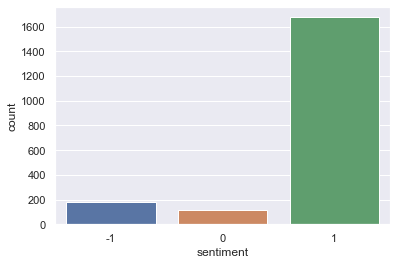

In [11]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [12]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60889/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0       0.6369
1       0.9362
2       0.0000
3       0.7845
4       0.6249
         ...  
1969    0.0000
1970    0.0000
1971    0.6124
1972    0.0000
1973    0.4588
Name: review_sentiment, Length: 1974, dtype: float64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf = LinearSVC(random_state=0)

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)

report=classification_report(y_test, y_test_pred, output_dict=True)
report

{'-1': {'precision': 0.7619047619047619,
  'recall': 0.45714285714285713,
  'f1-score': 0.5714285714285714,
  'support': 35},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 28},
 '1': {'precision': 0.9067796610169492,
  'recall': 0.9930394431554525,
  'f1-score': 0.9479512735326688,
  'support': 431},
 'accuracy': 0.8987854251012146,
 'macro avg': {'precision': 0.5562281409739037,
  'recall': 0.48339410009943656,
  'f1-score': 0.5064599483204134,
  'support': 494},
 'weighted avg': {'precision': 0.8451188270545987,
  'recall': 0.8987854251012146,
  'f1-score': 0.8675445321712151,
  'support': 494}}

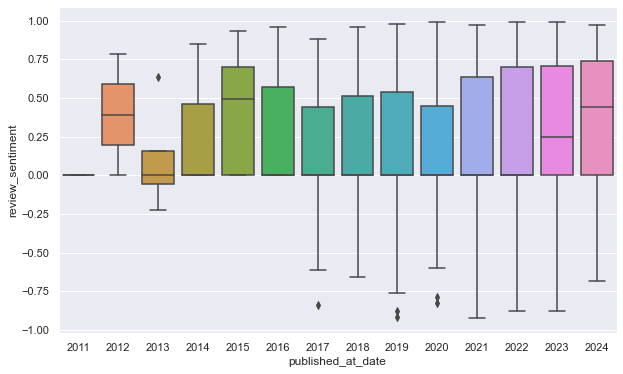

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='published_at_date', y='review_sentiment', data=df)
# sns.regplot(x='published_at_date', y='review_sentiment', data=df, scatter=False)

plt.show()

In [16]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2022

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

NameError: name 'mannwhitneyu' is not defined

In [ ]:
# make altered data into csv file
df.to_csv('altdata/' + 'ayada.csv', index=False)